### 1. Воздушные перевозки

Скачайте и распакуте следующий [архив](http://stat-computing.org/dataexpo/2009/2008.csv.bz2). Описание полей таблицы дано [здесь](http://www.transtats.bts.gov/Fields.asp?Table_ID=236).

Данные должны содержать перелеты воздушных судов в 2008 году (вероятно в США)

**Задание 1:** Рассчитать топ-10 массовых перевозчиков.

In [4]:
from __future__ import (absolute_import, division,
                        print_function, unicode_literals)
# отключим предупреждения Anaconda
import warnings
warnings.simplefilter('ignore')
import pandas as pd
import numpy as np
%pylab inline
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [162]:
df = pd.read_csv('C:/Users/Aspire/Documents/GitHub/2008.csv', sep = ',')

In [17]:
df.head(100).T

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
Year,2008,2008,2008,2008,2008,2008,2008,2008,2008,2008,...,2008,2008,2008,2008,2008,2008,2008,2008,2008,2008
Month,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
DayofMonth,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
DayOfWeek,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
DepTime,2003,754,628,926,1829,1940,1937,1039,617,1620,...,905,1739,906,816,1325,1506,2039,924,1611,1824
CRSDepTime,1955,735,620,930,1755,1915,1830,1040,615,1620,...,850,1640,905,815,1240,1440,1930,920,1535,1715
ArrTime,2211,1002,804,1054,1959,2121,2037,1132,652,1639,...,1334,114,1426,1339,1841,2030,155,1209,1849,117
CRSArrTime,2225,1000,750,1100,1925,2110,1940,1150,650,1655,...,1330,25,1430,1340,1810,2010,55,1210,1825,25
UniqueCarrier,WN,WN,WN,WN,WN,WN,WN,WN,WN,WN,...,WN,WN,WN,WN,WN,WN,WN,WN,WN,WN
FlightNum,335,3231,448,1746,3920,378,509,535,11,810,...,3222,1018,3948,249,419,2032,3940,71,538,2383


In [3]:
carriers = df['UniqueCarrier']
carriers.value_counts().head(10)

WN    1201754
AA     604885
OO     567159
MQ     490693
US     453589
DL     451931
UA     449515
XE     374510
NW     347652
CO     298455
Name: UniqueCarrier, dtype: int64

**Задание 2:** Построить распределение причин отмены рейсов

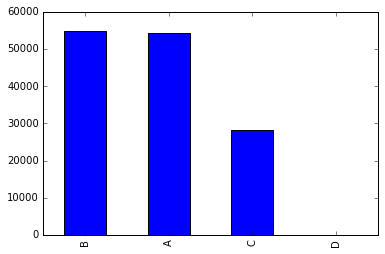

In [12]:
df['CancellationCode'].value_counts().plot(kind='bar')

**Задание 3:** Найти самый популярный маршрут, выдать статистику по данному маршруту.

In [173]:
df['race'] = (df['Origin']+df['Dest'])


In [18]:
df['race'].value_counts().head(1)

SFOLAX    13788
Name: race, dtype: int64

In [21]:
dfrace = df.loc[df['race'] == 'SFOLAX']

In [22]:
dfrace.describe()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,...,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,13788,13788.000000,13788.000000,13788.000000,13299.000000,13788.000000,13286.000000,13788.000000,13788.000000,13285.000000,...,13788,13286.000000,13299.000000,13788.000000,13788.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000
mean,2008,6.337322,15.730418,3.862997,1371.032408,1356.596388,1481.378820,1493.550116,1862.825573,82.417840,...,337,9.912163,17.273554,0.035466,0.001015,9.689688,0.360280,7.630808,0.026416,42.157225
std,0,3.358147,8.791381,1.973866,489.328348,472.940974,502.009856,473.465680,1999.167552,10.184247,...,0,5.120369,7.126813,0.184960,0.031850,27.959199,8.216006,16.685259,1.009160,46.774688
min,2008,1.000000,1.000000,1.000000,3.000000,540.000000,1.000000,5.000000,4.000000,58.000000,...,337,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2008,3.000000,8.000000,2.000000,941.000000,945.000000,1054.000000,1110.000000,817.000000,75.000000,...,337,7.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
50%,2008,6.000000,16.000000,4.000000,1355.000000,1315.000000,1507.000000,1443.000000,1153.000000,81.000000,...,337,9.000000,16.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,28.000000
75%,2008,9.000000,23.000000,5.000000,1809.000000,1756.000000,1919.000000,1920.000000,1957.000000,88.000000,...,337,12.000000,20.000000,0.000000,0.000000,7.000000,0.000000,11.000000,0.000000,64.000000
max,2008,12.000000,31.000000,7.000000,2400.000000,2240.000000,2400.000000,2359.000000,7815.000000,196.000000,...,337,106.000000,84.000000,1.000000,1.000000,339.000000,406.000000,401.000000,54.000000,373.000000


**Задание 4:** Найти топ-5 рейсов по каждому из типов delay. Каким перевозчикам они принадлежат?

In [35]:
df.sort(['CarrierDelay'], ascending=False).head(5)['race']

2235378    CLTMSP
2832617    RSWDTW
3387883    LITDFW
5232546    OMAMSP
2232494    MOTMSP
Name: race, dtype: object

In [ ]:
df.sort(['CarrierDelay'], ascending=False).head(5)['race']

2235378    CLTMSP
2832617    RSWDTW
3387883    LITDFW
5232546    OMAMSP
2232494    MOTMSP
Name: race, dtype: object

In [ ]:
df.sort(['NASDelay'], ascending=False).head(5)['race']

In [ ]:
df.sort(['SecurityDelay'], ascending=False).head(5)['race']

In [ ]:
df.sort(['LateAircraftDelay'], ascending=False).head(5)['race']

**Задание 5:** Определить, как распределено количество рейсов от времени дня?

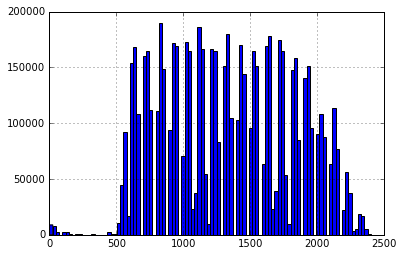

In [6]:
df['DepTime'].hist(bins=100)

**Задание 6:** Определить "сезонность" во временных рядах по количеству вылетов на каждый день.

In [163]:
grouped = df.groupby(['Month'])['DayofMonth']

In [164]:
val_c = grouped.value_counts()

In [165]:
df_new = val_c.to_frame(name='Mean')

In [166]:
df_new.groupby(level='Month').mean()

,Mean
Month,
1,19540.806452
2,19628.827586
3,19873.870968
4,19937.533333
5,19557.838710
6,20288.833333
7,20255.838710
8,19750.935484
9,18030.266667


### 2. Продолжаем изучать Pandas

Ввиду ограниченности времени, мы не успеваем рассмотреть всё на семинарах. Поэтому часть работы ложится на вас..

Загрузите две csv таблицы [отсюда](https://github.com/emorisse/FBI-Hate-Crime-Statistics) и импортируйте через Pandas. В них содержатся агрегированные данные по различным организациям\городам США, содержащие количество обращений по тем или иным случаям нарушения закона. В одной таблице (table13.csv) перечислены управления, которые сообщали об этих случаях, в другой - которые не сообщали.

**Задание 1:** Изучите документации для методов `unique_values`, `isin`. С помощью этой функции, определите, содержатся ли в двух таблицах одни и те же штаты.

In [5]:
df13 = pd.read_csv('C:/Users/Aspire/Documents/GitHub/table13.csv', sep = ',')
df14 = pd.read_csv('C:/Users/Aspire/Documents/GitHub/table14.csv', sep = ',')

In [6]:
state13 = df13['State'].unique()
state14 = df14['State'].unique()

In [38]:
state14

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia',
       'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky',
       'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan',
       'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska',
       'New_Hampshire', 'New_Jersey', 'New_Mexico', 'New_York',
       'North_Carolina', 'North_Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode_Island', 'South_Carolina', 'South_Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West_Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [7]:
pd.Series(state13).isin(pd.Series(state14))

0      True
1      True
2      True
3      True
4      True
5      True
6      True
7     False
8      True
9      True
10     True
11     True
12     True
13     True
14     True
15     True
16     True
17     True
18     True
19     True
20     True
21     True
22     True
23     True
24     True
25     True
26     True
27    False
28     True
29     True
30     True
31     True
32     True
33     True
34     True
35     True
36     True
37     True
38     True
39     True
40     True
41     True
42     True
43     True
44     True
45     True
46     True
47     True
48     True
49     True
dtype: bool

**Задание 2:** Изучите документации для методов `append`, `merge` и `concat`. Совместите две таблицы в одну.

In [192]:
df13

,State,Agency type,Agency name,Race,Religion,Sexual orientation,Ethnicity,Disability,Gender,Gender Identity,1st quarter,2nd quarter,3rd quarter,4th quarter,Population
0,Alabama,Cities,Florence,2,0,0,0,0,0,0,0,1,0,1,"39,481"
1,Alabama,Cities,Hoover,0,0,1,0,0,0,0,0,1,0,0,"84,139"
2,Alabama,Cities,Prattville,2,0,0,0,0,0,0,1,0,1,0,"35,154"
3,Alabama,Cities,Tuscaloosa,1,0,0,0,0,0,0,0,0,1,0,"94,126"
4,Alaska,Cities,Anchorage,8,0,0,0,0,0,0,2,3,3,0,"299,455"
5,Arizona,Cities,Apache Junction,1,0,0,0,0,0,0,1,0,0,NaN,"36,626"
6,Arizona,Cities,Avondale,4,0,0,1,0,0,0,1,1,3,0,"78,905"
7,Arizona,Cities,Eagar,0,0,0,1,0,0,0,0,1,0,0,"5,034"
8,Arizona,Cities,El Mirage,1,0,0,0,0,0,0,0,0,1,0,"32,837"
9,Arizona,Cities,Gilbert,1,0,0,0,0,0,0,1,0,0,0,"225,232"


In [16]:
df14

,State,Agency type,Agency name,1st quarter,2nd quarter,3rd quarter,4th quarter,Population,Disability
0,Alabama,Cities,Ashford,0,0,0,0,"2,177",0
1,Alabama,Cities,Ashland,0,0,0,0,"1,926",0
2,Alabama,Cities,Auburn,0,0,0,0,"57,970",0
3,Alabama,Cities,Berry,NaN,0,NaN,NaN,"1,124",0
4,Alabama,Cities,Childersburg,0,0,0,0,"5,111",0
5,Alabama,Cities,Courtland,0,0,0,0,607,0
6,Alabama,Cities,Demopolis,0,0,0,0,"7,240",0
7,Alabama,Cities,Eclectic,0,0,0,0,"1,015",0
8,Alabama,Cities,Enterprise,0,0,0,0,"28,145",0
9,Alabama,Cities,Eutaw,0,0,0,0,"2,871",0


In [10]:
df14.columns = ['State', 'Agency type', 'Agency name', '1st quarter', '2nd quarter', '3rd quarter', '4th quarter', 'Population']

In [17]:
df14['Disability'] = 0
df14['Ethnicity'] = 0
df14['Gender'] = 0
df14['Gender Identity'] = 0
df14['Race'] = 0
df14['Religion'] = 0
df14['Sexual orientation'] = 0

In [18]:
result = df13.append(df14)
result

,1st quarter,2nd quarter,3rd quarter,4th quarter,Agency name,Agency type,Disability,Ethnicity,Gender,Gender Identity,Population,Race,Religion,Sexual orientation,State
0,0,1,0,1,Florence,Cities,0,0,0,0,"39,481",2,0,0,Alabama
1,0,1,0,0,Hoover,Cities,0,0,0,0,"84,139",0,0,1,Alabama
2,1,0,1,0,Prattville,Cities,0,0,0,0,"35,154",2,0,0,Alabama
3,0,0,1,0,Tuscaloosa,Cities,0,0,0,0,"94,126",1,0,0,Alabama
4,2,3,3,0,Anchorage,Cities,0,0,0,0,"299,455",8,0,0,Alaska
5,1,0,0,NaN,Apache Junction,Cities,0,0,0,0,"36,626",1,0,0,Arizona
6,1,1,3,0,Avondale,Cities,0,1,0,0,"78,905",4,0,0,Arizona
7,0,1,0,0,Eagar,Cities,0,1,0,0,"5,034",0,0,0,Arizona
8,0,0,1,0,El Mirage,Cities,0,0,0,0,"32,837",1,0,0,Arizona
9,1,0,0,0,Gilbert,Cities,0,0,0,0,"225,232",1,0,0,Arizona


**Задание 3:** Изучите документации для методов `drop_dublicates` и `dropna`. Используйте метод `dropna` для очистки большой таблицы от пропусков. Что произошло? Почему? Исправьте таблицы, чтобы получить корректный ответ.

In [23]:
result = result.dropna()


**Задание 4:** Изучите документации для методов `set_index`, `reset_index` и `pivot_table`. Проиндексируйте общую таблицу по переменным State и Agency Type (одновременно). У вас должен появиться *мультииндекс*.

In [47]:
indexed_df = result.set_index(['State', 'Agency type'])


In [48]:
indexed_df

1st quarter  2nd quarter  3rd quarter  \
State    Agency type                                                        
Alabama  Cities                               0            1            0   
         Cities                               0            1            0   
         Cities                               1            0            1   
         Cities                               0            0            1   
Alaska   Cities                               2            3            3   
Arizona  Cities                               1            1            3   
         Cities                               0            1            0   
         Cities                               0            0            1   
         Cities                               1            0            0   
         Cities                               2            0            3   
         Cities                               0            0            0   
         Cities                               2            0            0   
         Cities                               0            0            0   
         Cities                               0            0            0   
         Cities                               2            0            1   
         Cities                               8            8            6   
         Cities                               3            5            0   
         Universities and Colleges            0            0            0   
         Universities and Colleges            2            0            0   
Arkansas Cities                               0            0            1   
         Cities                               0            0            1   
         Cities                               0            0            1   
         Cities                               0            1            0   
         Cities                               0            0            1   
         Cities                               0            0            0   
         Cities                               1            0            0   
         Cities                               0            0            1   
         Cities                               0            1            0   
         Cities                               1            0            0   
         Cities                               0            1            0   
...                                         ...          ...          ...   
Wyoming  Cities                               0            0            0   
         Cities                               0            0            0   
         Cities                               0            0            0   
         Cities                               0            0            0   
         Cities                               0            0            0   
         Cities                               0            0            0   
         Cities                               0            0            0   
         Cities                               0            0            0   
         Cities                               0            0            0   
         Cities                               0            0            0   
         Cities                               0            0            0   
         Cities                               0            0            0   
         Cities                               0            0            0   
         Cities                               0            0            0   
         Cities                               0            0            0   
         Cities                               0            0            0   
         Cities                               0            0            0   
         Cities                               0            0            0   
         Cities                               0            0            0   
         Cities                 

**Задание 5:** В Pandas можно идерировать по DataFrame! Ищучите документации для методов `iteritems`, `iterrows`, а так же посмотрите, как можно итерировать по сгруппированным DataFrame'ам. Выделите подтаблицу, состаящую из данных по 3 произвольным штатам и сгруппируйте её по переменным State и Agency Type. С помощью изученных методов (то есть итеративно) выведите суммарную популяцию по каждой паре <Штат>-<Тип>

In [52]:
indexed_df.columns

Index(['1st quarter', '2nd quarter', '3rd quarter', '4th quarter',
       'Agency name', 'Disability', 'Ethnicity', 'Gender', 'Gender Identity',
       'Population', 'Race', 'Religion', 'Sexual orientation'],
      dtype='object')

In [58]:
df_reseted = indexed_df.reset_index()

In [101]:
df_cut = df_reseted.loc[df_reseted['State'].isin({'Alabama', 'California', 'Texas'})]

In [104]:
df_cut['Population'] = df_cut['Population'].str.replace(',', '')

In [107]:
df_cut['Population'] = df_cut['Population'].astype(float)

In [108]:
df_group = df_cut.groupby(['State', 'Agency type'])

In [145]:
df_sum = df_group.sum()

In [146]:
df_sum = df_sum.reset_index()

In [149]:
for index, row in df_sum.iterrows():
    print(row['State'], row['Agency type'], row['Population'])

Alabama Cities 1023113.0
Alabama Universities and Colleges 19854.0
California Cities 31696400.0
California Universities and Colleges 953695.0
Texas Cities 18103294.0
Texas Universities and Colleges 859965.0


## 3. Метод градиентного спуска

Напомним суть метода градиентого спуска в контексте задачи линейной регрессии.

Дано описание $n$ объектов по $m$ признакам. Обычно оно выражается в виде матрицы размера $n \times m$: $X = [x^{(i)}_j]^{i=1\dots n}_{j=1\dots m} $.<br\> ($x^{(i)}_j$ означает $j$-ый признак $i$-го объекта) <br\>
Дана зависимая переменная, которая тоже имеет отношение к этим объекам: $y$ - вектор длины $n$.

Наша задача, выявить **линейную** зависимость между признаками в $X$ и значениями в $y$:
$$\hat{y} = X\beta \quad \Leftrightarrow \quad \hat{y}^{(i)} = \beta_0 + \beta_1x^{(i)}_1 + \dots$$

И сделать это так, чтобы квадрат суммы ошибок наших оценок был минимален:
$$ L(\beta) = \frac{1}{2n}(\hat{y} - y)^{\top}(\hat{y} - y) = \frac{1}{2n}(X\beta - y)^{\top}(X\beta - y) \rightarrow \min$$ $$ \Updownarrow $$  $$ L(\beta_0,\beta_1,\dots) = \frac{1}{2n}\sum^{n}_{i=1}(\hat{y}^{(i)} - y^{(i)})^2 = \frac{1}{2n}\sum^{n}_{i=1}(\beta_0 + \beta_1x^{(i)}_1 + \dots - y^{(i)})^2  \rightarrow \min $$

Значение в $X$ и $y$ нам даны. Нам неизвестны только значения коэффициентов $\beta$.<br\> Соответственно, нужно найти такие значения $\beta$, что функция $L(\beta) \rightarrow \min.$

На семинаре мы выяснили, чему равен градиент функции потерь $L(\beta_0, \beta_1):$
$$ \frac{\partial L}{\partial \beta_0} = \frac{1}{n}\sum^{n}_{i=1}(\beta_0 + \beta_1x^{(i)}_1 - y^{(i)})$$
$$ \frac{\partial L}{\partial \beta_1} = \frac{1}{n}\sum^{n}_{i=1}(\beta_0 + \beta_1x^{(i)}_1 - y^{(i)})x_1^{(i)}$$

Иногда проще это записать в виде матриц:
$$ \frac{\partial L}{\partial \beta} = X^\top(X\beta - y)$$


Метод градиентного спуска заключается в итеративном и **одновременном(!!!)** обновлении значений $\beta$ в направлении, противоположному градиенту:
$$ \beta := \beta - \alpha\frac{\partial L}{\partial \beta}$$

**Задача 1:** Загрузите [данные](http://bit.ly/1gIQs6C) по характеристикам автомобилей Honda Accord. Названия столбцов говорят сами за себя.

Составьте матрицу $X$, состоящую из единичного столбца и признака "пробег". <br\>
Составьте вектор $y$ состоящий из стоимости автомобиля.

Если для импорта вы используете `pandas`, то через .values из DataFrame можно получить numpy array.

In [151]:
import scipy as sp

In [50]:
df_cars = pd.read_csv('C:/Users/Aspire/Documents/GitHub/accord_sedan_training.csv', sep = ',')

In [170]:
X = np.array([[1]*df_cars.shape[0], df_cars['mileage']]).T
X

array([[     1,  67697],
       [     1,  73738],
       [     1,  80313],
       [     1,  86096],
       [     1,  79607],
       [     1,  96966],
       [     1, 126150],
       [     1, 119255],
       [     1,  73513],
       [     1,  50649],
       [     1,  90000],
       [     1, 114340],
       [     1,  75270],
       [     1,  54685],
       [     1,  68480],
       [     1, 107290],
       [     1,  39144],
       [     1,  42893],
       [     1, 103650],
       [     1,  59100],
       [     1,  96404],
       [     1,  59466],
       [     1,  89692],
       [     1,  91486],
       [     1,  90256],
       [     1,  85976],
       [     1, 103833],
       [     1,  37378],
       [     1,  45414],
       [     1, 108590],
       [     1, 121435],
       [     1,  99904],
       [     1, 121896],
       [     1,  70193],
       [     1, 103927],
       [     1,  34216],
       [     1, 135766],
       [     1,  89350],
       [     1, 133721],
       [     1, 109034],


In [171]:
Y = np.array(df_cars['price'])
Y

array([14995, 11988, 11999, 12995, 11333, 10067,  8999, 10595, 13988,
       13990, 12998, 10975, 12989, 14590, 16120,  9880, 12991, 13495,
       11495, 12000, 12000, 14900, 10499, 11680, 12950, 13681, 10694,
       15991, 13995, 11999,  9995, 11995,  9968, 13475, 13900, 13995,
       10888, 12995,  8999, 10692,  7995,  9998, 12999, 12791, 13420,
        9488, 13250, 10642, 13999, 12599, 11995, 12595,  8495, 12950,
        9994,  8991, 12736, 15995, 15991,  9692,  9488, 12495, 12482,
       11900, 11757,  9878, 11988, 11995, 10988, 13637, 14888, 11995,
        7900, 11037, 12413, 15995, 14999,  9495, 16990, 13995, 12810,
        8500, 11949, 10288, 16595, 14995, 10490,  8980, 10995, 11991,
       12589,  9000,  9995, 11995, 12895, 14971, 12998, 12441, 13995,
       15995, 13000, 10988, 13219, 11988, 11995, 11274, 12995, 12988,
       13500, 13850,  7695,  7991,  8998, 13980, 12988, 12995, 12800,
       11990, 12998,  8995, 12977, 11991, 10995, 13995,  9686,  8988,
        8880, 11394,

**Задача 2:** Изобразите функционал квадратичной ошибки $L(\beta_0, \beta_1)$ в 3D и его линии уровня

In [18]:
# Здесь ваш код

**Задача 3:** Напишите код, реализующий метод градиентного спуска. На вход метод должен принимать исходные данные, максимальное кол-во итераций и коэффициент скорости спуска.

In [19]:
# Здесь ваш код

**Задача 4:** Выведите полученные значения коэфициентов $\beta$. <br\>Как они интерпретируются?  <br\>Изобразите на одном графике $[y - \text{"пробег"}]$ точки и полученную прямую.

In [20]:
# Здесь ваш код